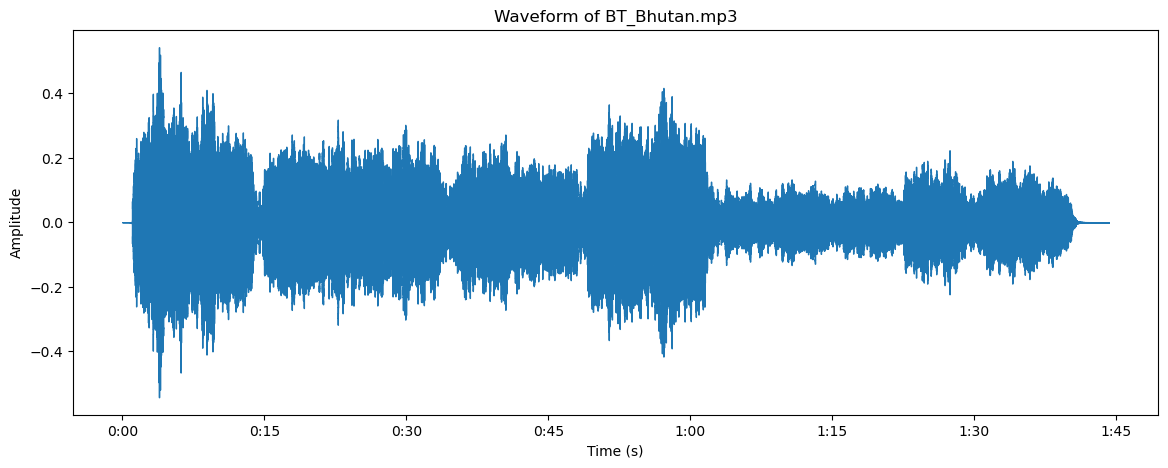

In [3]:
# %% Cell 1: Load and Plot Waveform of a Single MP3 File
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Absolute path to a sample audio file (update if needed)
sample_file = "/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-A/mp3/BT_Bhutan.mp3"
y, sr = librosa.load(sample_file)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of BT_Bhutan.mp3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


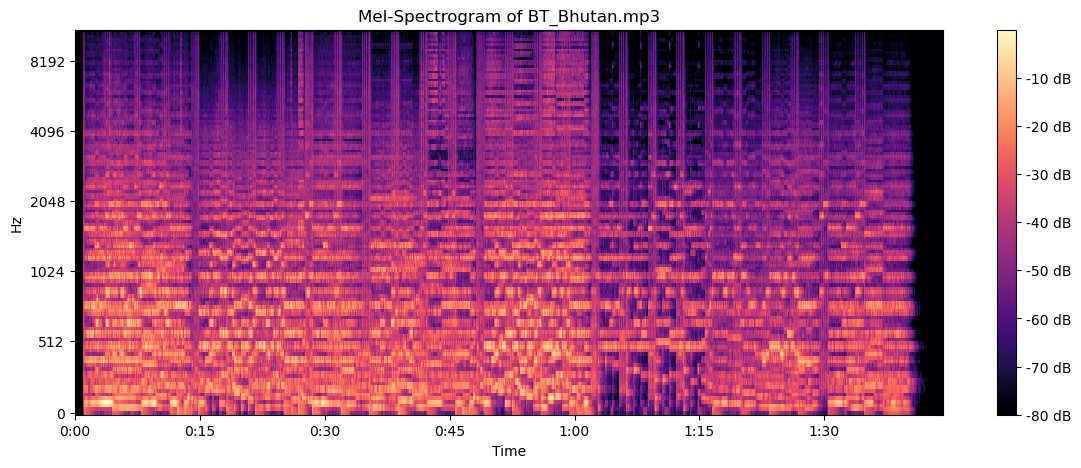

In [4]:
# %% Cell 2: Mel-Spectrogram Analysis
import numpy as np
import librosa.display

# Using the sample audio file loaded in Cell 1 (y, sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel-Spectrogram of BT_Bhutan.mp3")
plt.colorbar(format='%+2.0f dB')
plt.show()


/var/folders/5d/c68pgd1s5w32z30qsl196tq80000gn/T/ipykernel_13481/2673574318.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Estimated tempo: {float(tempo):.2f} BPM")


Estimated tempo: 143.55 BPM


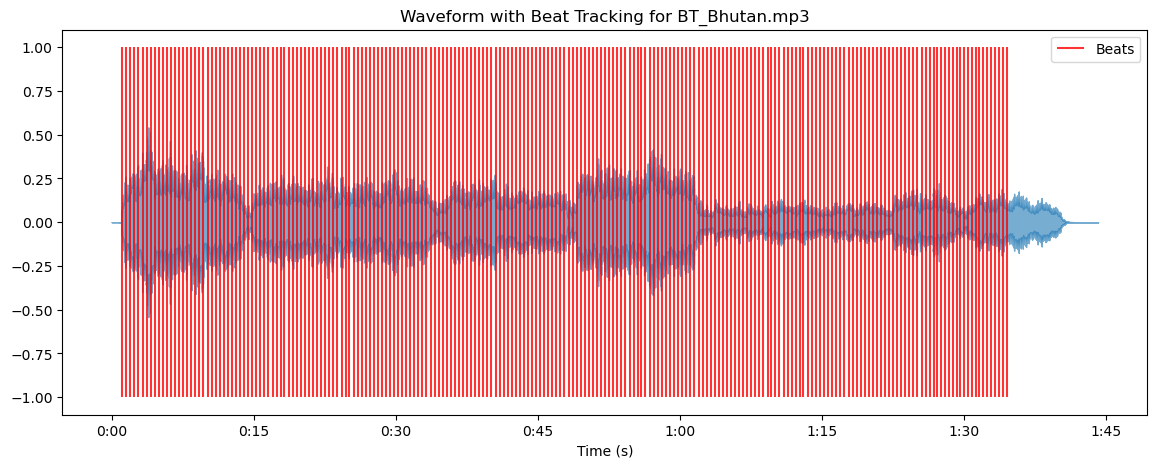

In [6]:
# %% Cell 3: Beat Tracking and Tempo Estimation
import librosa.display

# Compute tempo and beat frames for the sample file
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(f"Estimated tempo: {float(tempo):.2f} BPM")

# Convert beat frames to time
beat_times = librosa.frames_to_time(beats, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r', alpha=0.8, label='Beats')
plt.title("Waveform with Beat Tracking for BT_Bhutan.mp3")
plt.xlabel("Time (s)")
plt.legend()
plt.show()


Note: Illegal Audio-MPEG-Header 0x4994206d at offset 1255587.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 1947689.
Note: Trying to resync...
Note: Skipped 753 bytes in input.


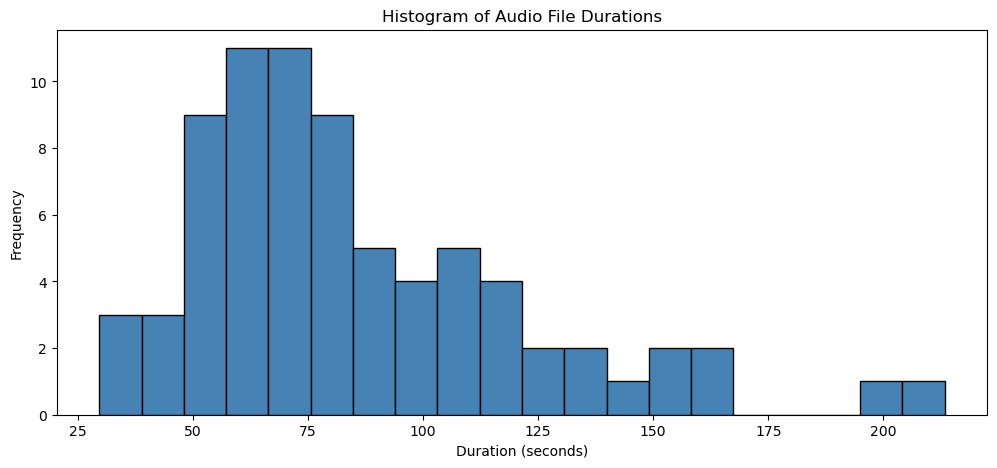

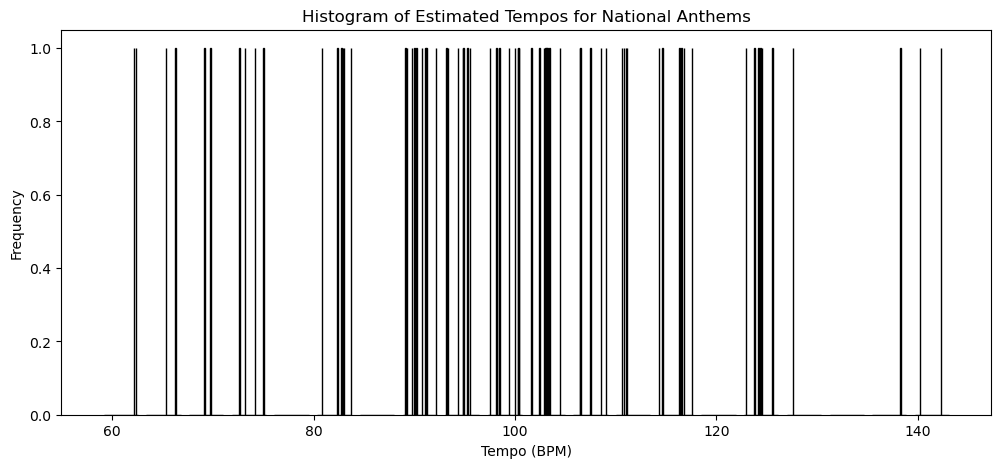

In [8]:
# %% Cell 4: Batch Processing of Audio Files for Duration and Tempo
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Absolute path to the directory containing MP3 files
audio_dir = "/Users/shivansh420/Desktop/MMDP-2_Dataset/Task-3/Task-A/mp3"
durations = []
tempos = []
file_names = []

# Loop through all MP3 files in the directory
for file in os.listdir(audio_dir):
    if file.lower().endswith(".mp3"):
        file_path = os.path.join(audio_dir, file)
        try:
            y, sr = librosa.load(file_path)
            duration = librosa.get_duration(y=y, sr=sr)
            durations.append(duration)
            tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
            tempos.append(tempo)
            file_names.append(file)
        except Exception as e:
            print(f"Error processing {file}: {e}")

# Plot histogram of durations
plt.figure(figsize=(12, 5))
plt.hist(durations, bins=20, edgecolor='black', color='steelblue')
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Histogram of Audio File Durations")
plt.show()

# Plot histogram of tempos
plt.figure(figsize=(12, 5))
plt.hist(tempos, bins=20, edgecolor='black')
plt.xlabel("Tempo (BPM)")
plt.ylabel("Frequency")
plt.title("Histogram of Estimated Tempos for National Anthems")
plt.show()


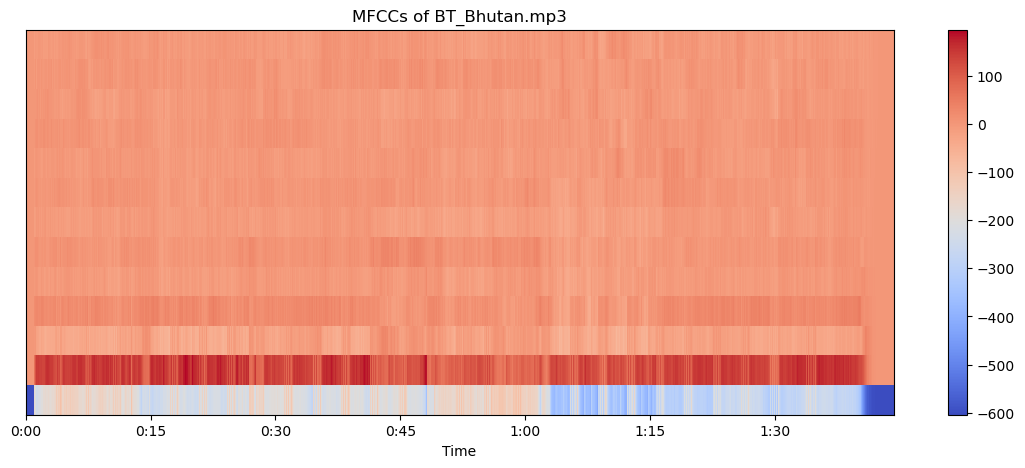

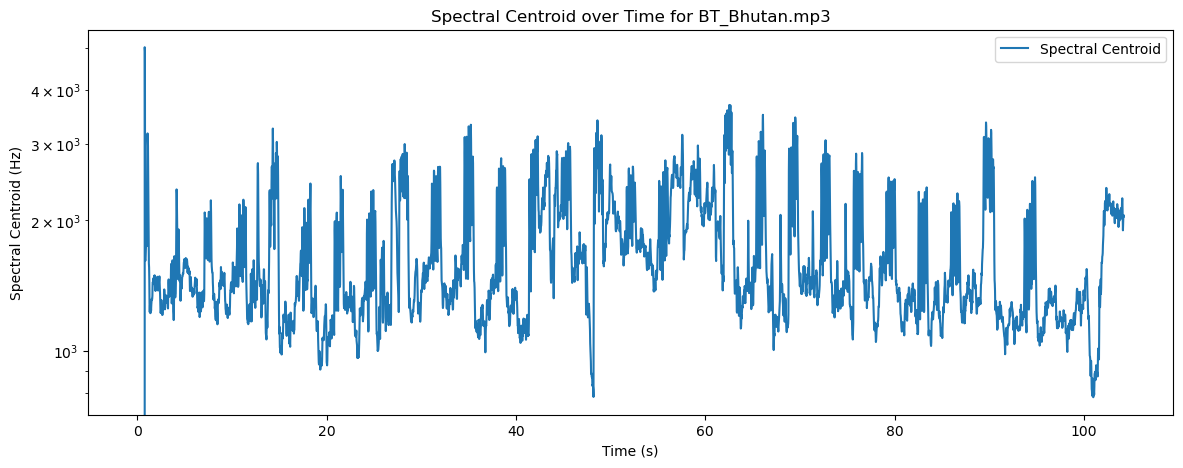

In [9]:
# %% Cell 5: MFCCs and Spectral Centroid Analysis for a Sample File
import librosa.display

# Using the sample_file loaded earlier (BT_Bhutan.mp3)
y, sr = librosa.load(sample_file)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCCs of BT_Bhutan.mp3")
plt.show()

# Compute spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(14, 5))
plt.semilogy(t, spectral_centroids, label='Spectral Centroid')
plt.xlabel("Time (s)")
plt.ylabel("Spectral Centroid (Hz)")
plt.title("Spectral Centroid over Time for BT_Bhutan.mp3")
plt.legend()
plt.show()
